In [1]:
import sys
sys.path.append("../src")

from pdb_parser import PDBStructureParser
from feature_extractor import RawFeatureExtractor
from spatial_graph_construction import SpatialGraphBuilder
from representation import ProteinGraph
from encoder import ProteinGraphEncoder
from decoder import ProteinGraphDecoder
from validation import (
    validate_shapes,
    validate_encode_decode,
    validate_edge_consistency
)
from visualize import visualize_protein_graph


In [2]:
PDB_PATH = "../data/7rfw.pdb"

parser = PDBStructureParser(PDB_PATH)
parsed_residues = parser.parse()

print(f"Parsed residues: {len(parsed_residues)}")
parsed_residues[0]


Parsed residues: 306


{'residue_name': 'SER',
 'residue_id': 1,
 'chain_id': 'A',
 'ca_coord': array([ -2.3900001 ,   6.46899986, -16.31999969])}

In [3]:
feature_extractor = RawFeatureExtractor()
raw_features = feature_extractor.extract(parsed_residues)

print(f"Extracted features: {len(raw_features)}")
raw_features[0]


Extracted features: 306


{'residue_index': 15,
 'physchem': array([ 0. , -0.8,  1. ]),
 'coord': array([ -2.3900001 ,   6.46899986, -16.31999969])}

In [4]:
graph_builder = SpatialGraphBuilder()
edge_index, edge_attr = graph_builder.build_graph(raw_features)

print("edge_index shape:", edge_index.shape)
print("edge_attr shape:", edge_attr.shape)


edge_index shape: (2, 2920)
edge_attr shape: (2920, 1)


In [5]:
protein_graph = ProteinGraph(
    residue_features=raw_features,
    edge_index=edge_index,
    edge_attr=edge_attr
)

protein_graph.node_features.shape


(306, 7)

In [6]:
encoder = ProteinGraphEncoder()
encoded = encoder.encode(protein_graph)

validate_shapes(encoded)

encoded


{'node_features': tensor([[ 15.0000,   0.0000,  -0.8000,  ...,  -2.3900,   6.4690, -16.3200],
         [  7.0000,   0.0000,  -0.4000,  ...,  -2.3380,   7.1050, -12.5570],
         [ 13.0000,   0.0000,   2.8000,  ...,   0.4360,   7.0480,  -9.9690],
         ...,
         [ 16.0000,   0.0000,  -0.7000,  ...,   5.1710,  -8.4100, -12.4280],
         [ 13.0000,   0.0000,   2.8000,  ...,   6.3770, -11.0470,  -9.9120],
         [  6.0000,   0.0000,  -3.5000,  ...,   5.7030, -14.8060,  -9.5010]]),
 'edge_index': tensor([[  0,   1,   0,  ..., 305, 304, 305],
         [  1,   0,   2,  ..., 303, 305, 304]]),
 'edge_attr': tensor([[3.8167],
         [3.8167],
         [6.9754],
         ...,
         [7.0540],
         [3.8410],
         [3.8410]])}

In [7]:
decoder = ProteinGraphDecoder()
decoded = decoder.decode(encoded)

decoded["residues"][0]


{'residue_index': 15,
 'physchem': array([ 0. , -0.8,  1. ], dtype=float32),
 'coord': array([ -2.39 ,   6.469, -16.32 ], dtype=float32)}

In [8]:
validate_encode_decode(protein_graph, decoded)
validate_edge_consistency(protein_graph, decoded)

print("✅ Encode–Decode consistency verified")


✅ Encode–Decode consistency verified


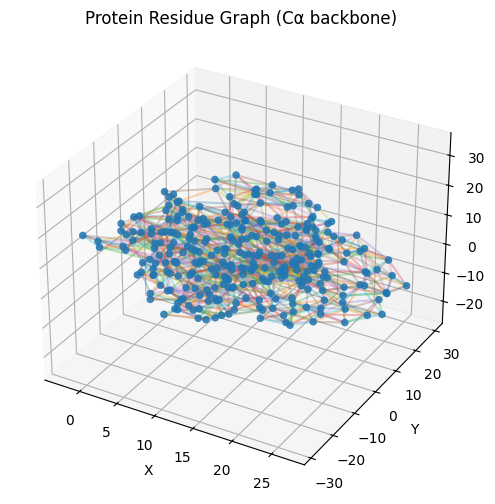

In [9]:
visualize_protein_graph(decoded)
